In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
# Last inn data
data = pd.read_csv('Data/data_grouped.csv')
# lag nye navn fra-sone-6 og til-sone-6 til fra-sone og til-sone
data = data.rename(columns={'fra-sone-6': 'fra-sone', 'til-sone-6': 'til-sone', 'fri_hen_priv': 'fritid'})
# Lag en hjelpe-tabell med unike soner og befolkning
pop_lookup = data[['fra-sone', 'befolkning']].drop_duplicates()
pop_lookup.columns = ['sone', 'til_befolkning']

# Slå opp befolkning for to_zone basert på from_zone-informasjon
df = data.merge(pop_lookup, left_on='til-sone', right_on='sone', how='left')
df = df.drop(columns='sone')

data = df


In [ ]:
# Hvor mange rader er det i datasettet?
antall_rader = len(data)
print(f"Antall rader i datasettet: {antall_rader}")

### Fordelingen til kolonner

In [16]:

mean_values = data.drop(columns=['tid', 'fra-sone', 'til-sone']).mean()
min_values = data.drop(columns=['tid', 'fra-sone', 'til-sone']).min()
max_values = data.drop(columns=['tid', 'fra-sone', 'til-sone']).max()

print("Mean values for all columns:")
print(mean_values)
print("\nMin values for all columns:")
print(min_values)
print("\nMax values for all columns:")
print(max_values)

Mean values for all columns:
reiser            214.535300
arbeidsplasser    304.273712
distanse           40.956241
handel             60.749691
fritid            179.371993
befolkning        531.726243
til_befolkning    530.810262
dtype: float64

Min values for all columns:
reiser            5.00
arbeidsplasser    0.00
distanse          0.01
handel            0.00
fritid            0.00
befolkning        0.00
til_befolkning    0.00
dtype: float64

Max values for all columns:
reiser            349417.7126
arbeidsplasser      3603.0000
distanse             350.0000
handel               976.0000
fritid              3557.0000
befolkning          2014.9500
til_befolkning      2014.9500
dtype: float64


In [18]:
mean_values = data.drop(columns=['tid', 'fra-sone', 'til-sone']).mean()
std_values = data.drop(columns=['tid', 'fra-sone', 'til-sone']).std()
median_values = data.drop(columns=['tid', 'fra-sone', 'til-sone']).median()

print("Mean values for all columns:")
print(mean_values)
print("\nStandard deviation for all columns:")
print(std_values)
print("\nMedian values for all columns:")
print(median_values)

Mean values for all columns:
reiser            214.535300
arbeidsplasser    304.273712
distanse           40.956241
handel             60.749691
fritid            179.371993
befolkning        531.726243
til_befolkning    530.810262
dtype: float64

Standard deviation for all columns:
reiser            1999.579756
arbeidsplasser     504.267141
distanse            45.021496
handel             138.046911
fritid             360.470842
befolkning         392.914796
til_befolkning     393.402943
dtype: float64

Median values for all columns:
reiser             30.3129
arbeidsplasser    117.0000
distanse           28.8200
handel             10.0000
fritid             47.0000
befolkning        437.9700
til_befolkning    437.9700
dtype: float64


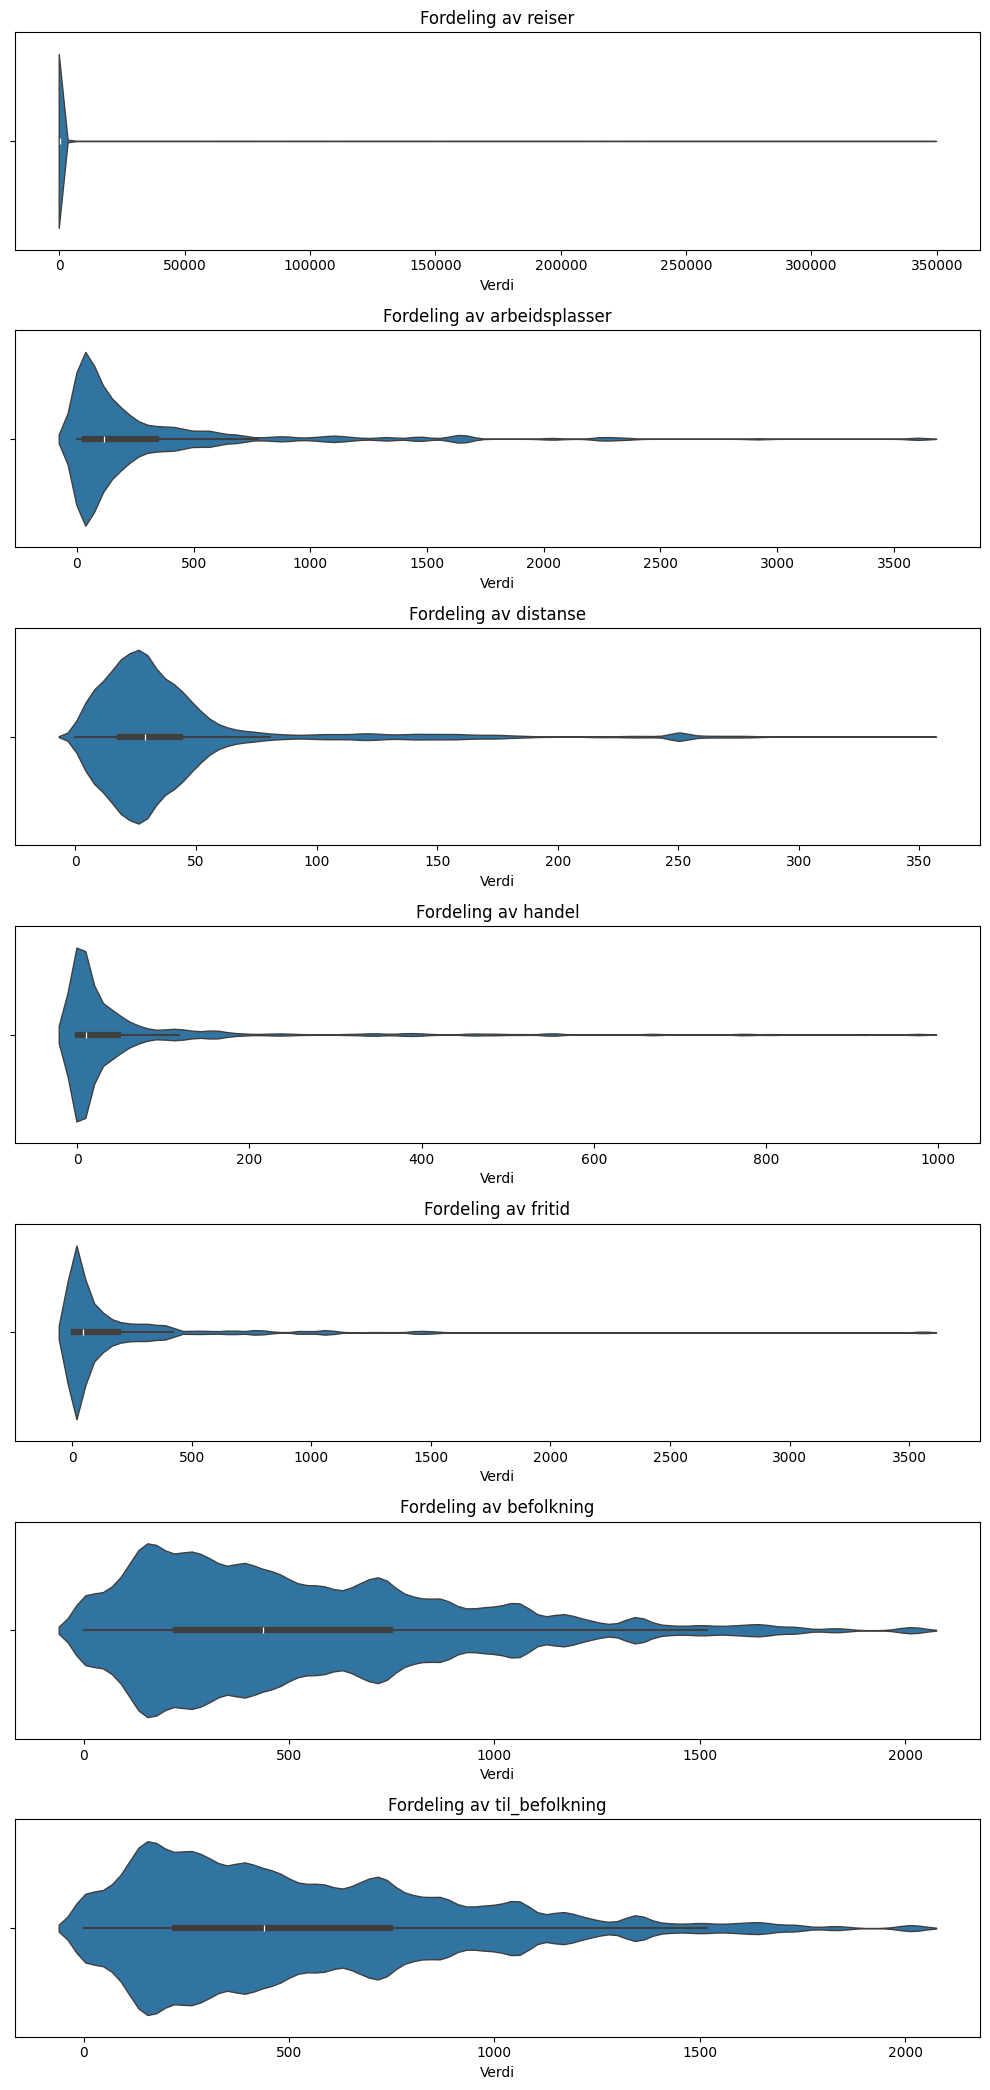

In [20]:

# Filtrer ut kolonnene som ikke skal inkluderes
kolonner_utelatt = ['fra-sone', 'til-sone', 'tid']
numeriske_kolonner = [col for col in data.columns if col not in kolonner_utelatt]

# Lag violin-plott for de gjenværende variablene
fig, axes = plt.subplots(nrows=len(numeriske_kolonner), ncols=1, figsize=(10, 3 * len(numeriske_kolonner)))

for i, col in enumerate(numeriske_kolonner):
    sns.violinplot(x=data[col], ax=axes[i], linewidth=1)
    axes[i].set_title(f"Fordeling av {col}")
    axes[i].set_xlabel("Verdi")

plt.tight_layout()
plt.show()

### Forhold mellom kolonner

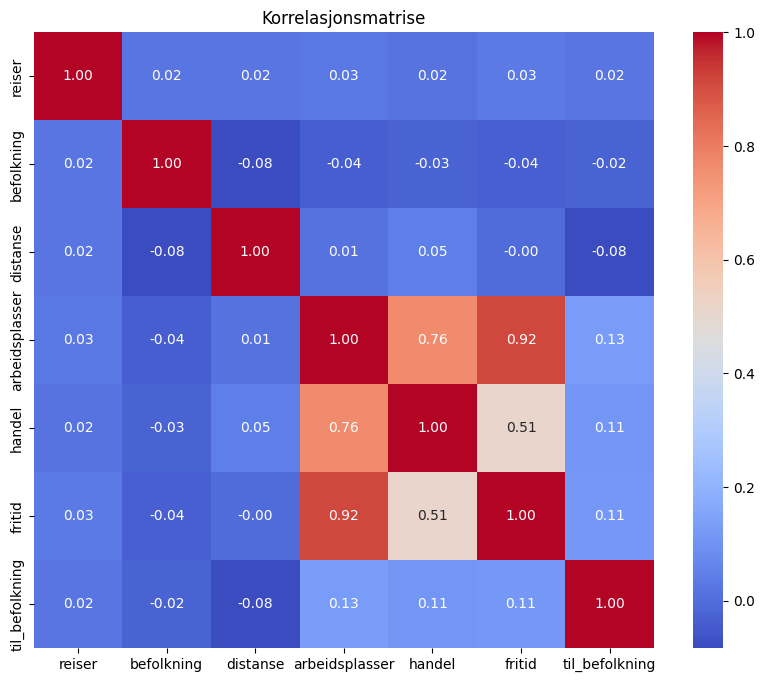

In [21]:
# Velg de spesifikke kolonnene
columns = ['reiser', 'befolkning', 'distanse', 'arbeidsplasser', 'handel', 'fritid', 'til_befolkning']
selected_data = data[columns]

# Beregn korrelasjonsmatrisen
correlation_matrix = selected_data.corr()

# Vis korrelasjonsmatrisen som en heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelasjonsmatrise')
plt.show()

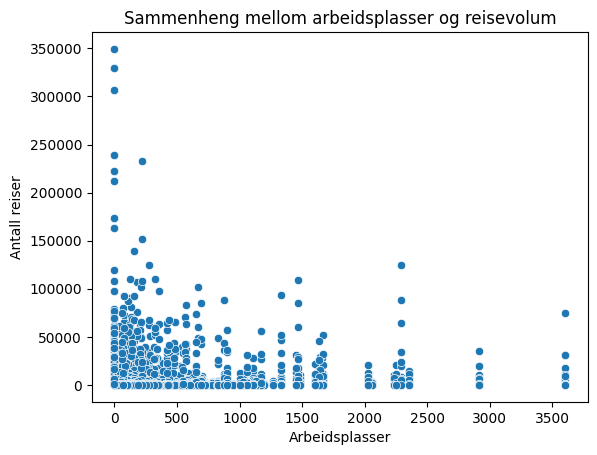

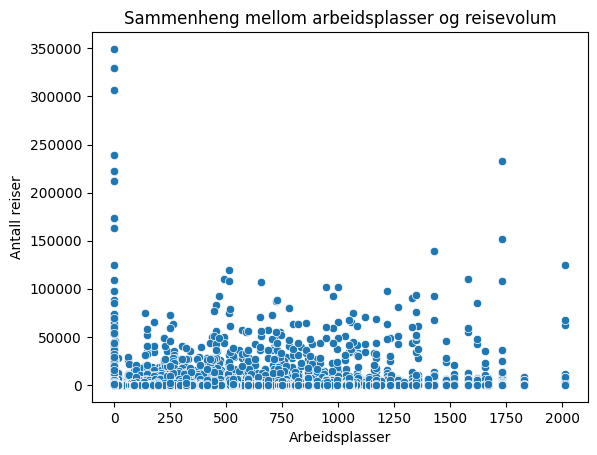

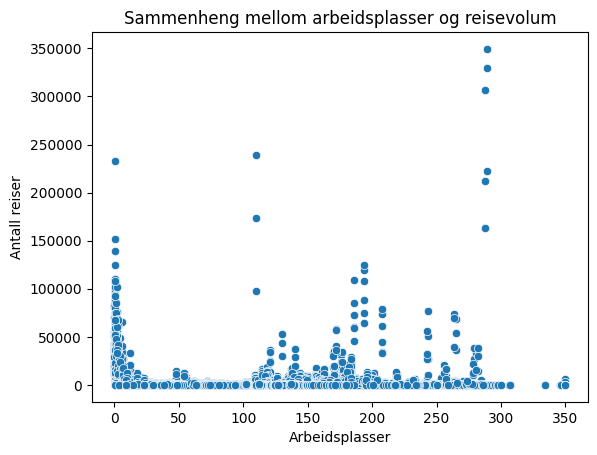

In [22]:
sns.scatterplot(x=data["arbeidsplasser"], y=data["reiser"])
plt.title("Sammenheng mellom arbeidsplasser og reisevolum")
plt.xlabel("Arbeidsplasser")
plt.ylabel("Antall reiser")
plt.show()

sns.scatterplot(x=data["befolkning"], y=data["reiser"])
plt.title("Sammenheng mellom arbeidsplasser og reisevolum")
plt.xlabel("Arbeidsplasser")
plt.ylabel("Antall reiser")
plt.show()

sns.scatterplot(x=data["distanse"], y=data["reiser"])
plt.title("Sammenheng mellom arbeidsplasser og reisevolum")
plt.xlabel("Arbeidsplasser")
plt.ylabel("Antall reiser")
plt.show()


In [23]:
# Finn antallet rader der reiser er mindre enn 10

d = data[data['reiser'] < 10].shape[0]
print(d)
# mer enn 10, men mindre enn 100
d = data[(data['reiser'] > 10) & (data['reiser'] < 100)].shape[0]
print(d)
# mer enn 100, men mindre enn 1000
d = data[(data['reiser'] > 100) & (data['reiser'] < 1000)].shape[0]
print(d)
# mer enn 1000
d = data[data['reiser'] > 1000].shape[0]
print(d)

# Summer opp toalt antall reiser for alle ruter der reiser er mindre enn 10
d = data[data['reiser'] < 10]['reiser'].sum()
print(d)
# summer opp totalt antall reiser for alle ruter der reiser er mer enn 10, men mindre enn 100
d = data[(data['reiser'] > 10) & (data['reiser'] < 100)]['reiser'].sum()
print(d)
# summer opp totalt antall reiser for alle ruter der reiser er mer enn 100, men mindre nn 1000
d = data[(data['reiser'] > 100) & (data['reiser'] < 1000)]['reiser'].sum()
print(d)
# summer opp totalt antall reiser for alle ruter der reiser er mer enn 1000
d = data[data['reiser'] > 1000]['reiser'].sum()
print(d)

89138
180381
87084
12829
583087.0857999999
6564549.500499998
26354507.1998
45754061.2746


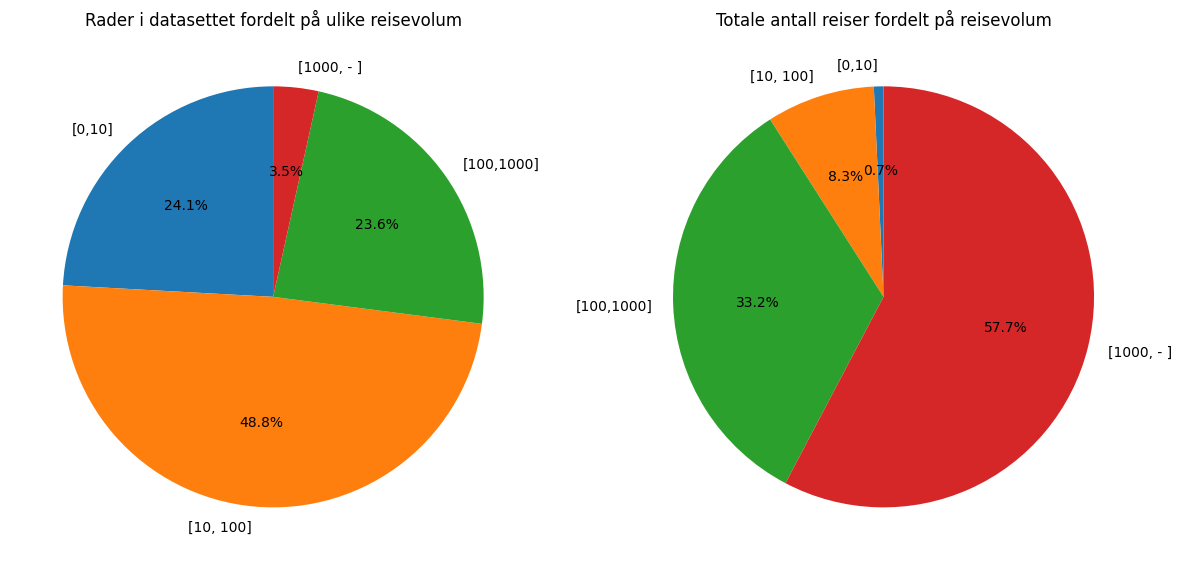

In [24]:
# Data
labels = ['[0,10]', '[10, 100]', '[100,1000]', '[1000, - ]']
sonepar = [89138, 180381, 87084, 12829]
reiser = [583087, 6594549, 26354507, 45754061]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Sirkeldiagram 1: Antall sone-par
axs[0].pie(sonepar, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Rader i datasettet fordelt på ulike reisevolum')

# Sirkeldiagram 2: Antall reiser
axs[1].pie(reiser, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Totale antall reiser fordelt på reisevolum')

plt.tight_layout()
plt.show()